<a href="https://colab.research.google.com/github/sana-f-shah/Smart-Meter-Forecasting/blob/main/notebooks/1_eda_and_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
import pandas as pd
import openpyxl

data = "/content/drive/MyDrive/Portfolio/Smart Meter Forecasting/ukpn-smart-meter-consumption-substation.xlsx"

df = pd.read_excel(data)

df.to_parquet('/content/drive/MyDrive/Portfolio/Smart Meter Forecasting/data.parquet', index=False)
"""

'\nimport pandas as pd\nimport openpyxl\n\ndata = "/content/drive/MyDrive/Portfolio/Smart Meter Consumption/ukpn-smart-meter-consumption-substation.xlsx"\noutput = "/content/drive/MyDrive/Portfolio/Smart Meter Consumption/ukpn-smart-meter-consumption-substation.xlsx"\n\ndf = pd.read_excel(data)\n\ndf.to_parquet(\'/content/drive/MyDrive/Portfolio/Smart Meter Consumption/data.parquet\', index=False)\n'

In [ ]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/Portfolio/Smart Meter Forecasting/data.parquet')

In [ ]:
df.head()

,dataset_id,dno,dno_alias,secondary_substation_id,geopoint,aggregated_device_count_active,primary_consumption_active_import,secondary_consumption_active_import,total_consumption_active_import,aggregated_device_count_reactive,total_consumption_reactive_import,data_collection_log_timestamp,insert_time,last_modified_time
0,UKPN_July_2024,UK Power Networks,UKPN_EPN,EPN-S0000008U0932,"51.9026320256079, -0.482016081054763",145.0,25333.0,0.0,25333.0,153,1936,2024-06-18T20:30:00+01:00,2024-07-13T01:00:00+01:00,2024-07-13T01:00:00+01:00
1,UKPN_July_2024,UK Power Networks,UKPN_EPN,EPN-S0000005U1215,"52.3298598543243, 1.67705028015796",NaN,NaN,NaN,NaN,7,106,2024-06-26T10:00:00+01:00,2024-07-17T01:00:00+01:00,2024-07-17T01:00:00+01:00
2,UKPN_July_2024,UK Power Networks,UKPN_EPN,EPN-R00000000B43Q-000-098Z,"52.2077433344619, -0.530467438451076",9.0,1002.0,0.0,1002.0,9,213,2024-06-23T06:00:00+01:00,2024-07-18T01:00:00+01:00,2024-07-18T01:00:00+01:00
3,UKPN_July_2024,UK Power Networks,UKPN_EPN,EPN-S0000004U0691,"52.0982651892186, -0.530402598974317",40.0,8219.0,0.0,8219.0,54,1185,2024-06-08T12:00:00+01:00,2024-07-11T01:00:00+01:00,2024-07-11T01:00:00+01:00
4,UKPN_July_2024,UK Power Networks,UKPN_EPN,EPN-S0000004U0648,"52.0628738997526, -0.547329397301785",93.0,9153.0,0.0,9153.0,105,807,2024-06-29T01:30:00+01:00,2024-07-12T01:00:00+01:00,2024-07-12T01:00:00+01:00


In [ ]:
print(df.shape)

(1264318, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264318 entries, 0 to 1264317
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   dataset_id                           1264318 non-null  object 
 1   dno                                  1264318 non-null  object 
 2   dno_alias                            1264318 non-null  object 
 3   secondary_substation_id              1264318 non-null  object 
 4   geopoint                             1248478 non-null  object 
 5   aggregated_device_count_active       1224902 non-null  float64
 6   primary_consumption_active_import    1224902 non-null  float64
 7   secondary_consumption_active_import  1224902 non-null  float64
 8   total_consumption_active_import      1224902 non-null  float64
 9   aggregated_device_count_reactive     1264318 non-null  int64  
 10  total_consumption_reactive_import    1264318 non-null  int64  
 11

In [ ]:
df.describe()

,aggregated_device_count_active,primary_consumption_active_import,secondary_consumption_active_import,total_consumption_active_import,aggregated_device_count_reactive,total_consumption_reactive_import
count,1.224902e+06,1.224902e+06,1224902.0,1.224902e+06,1.264318e+06,1.264318e+06
mean,5.888970e+01,9.381425e+03,0.0,9.381425e+03,5.988922e+01,8.235398e+02
std,5.035260e+01,8.232589e+03,0.0,8.232589e+03,4.847606e+01,8.992035e+02
min,6.000000e+00,0.000000e+00,0.0,0.000000e+00,6.000000e+00,0.000000e+00
25%,2.100000e+01,3.427000e+03,0.0,3.427000e+03,2.100000e+01,2.450000e+02
50%,4.700000e+01,7.039000e+03,0.0,7.039000e+03,4.800000e+01,5.680000e+02
75%,8.100000e+01,1.285400e+04,0.0,1.285400e+04,8.500000e+01,1.097000e+03
max,3.880000e+02,8.494200e+04,0.0,8.494200e+04,3.170000e+02,5.795200e+04


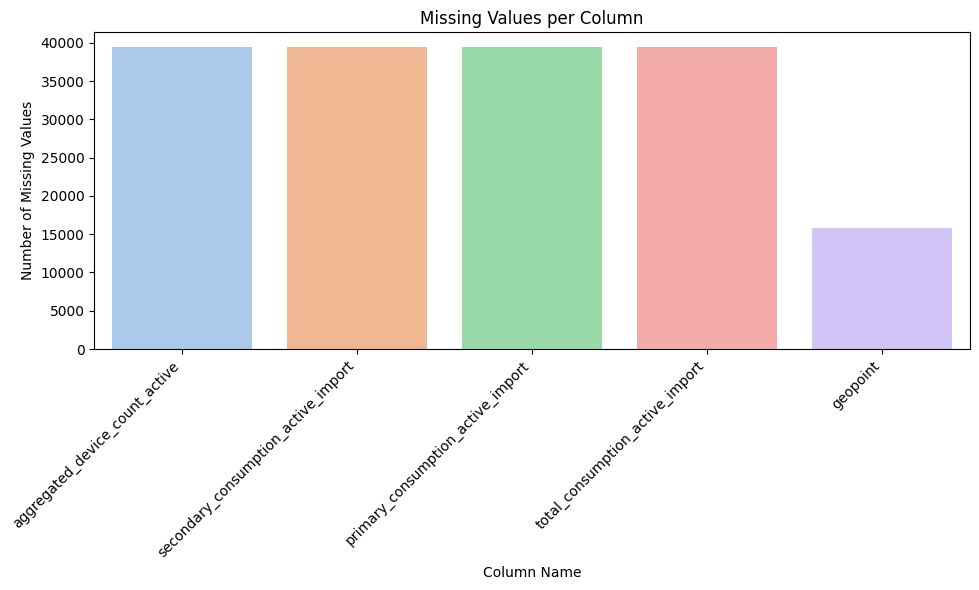

,missing_count,missing_percent
aggregated_device_count_active,39416,3.117570
secondary_consumption_active_import,39416,3.117570
primary_consumption_active_import,39416,3.117570
total_consumption_active_import,39416,3.117570
geopoint,15840,1.252849


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, hue=missing_counts.index, palette="pastel")
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Column Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

missing_table = (
    df.isnull().sum()
    .to_frame(name='missing_count')
    .assign(missing_percent=lambda x: (x['missing_count'] / len(df)) * 100)
    .query('missing_count > 0')
    .sort_values('missing_count', ascending=False)
)

missing_table

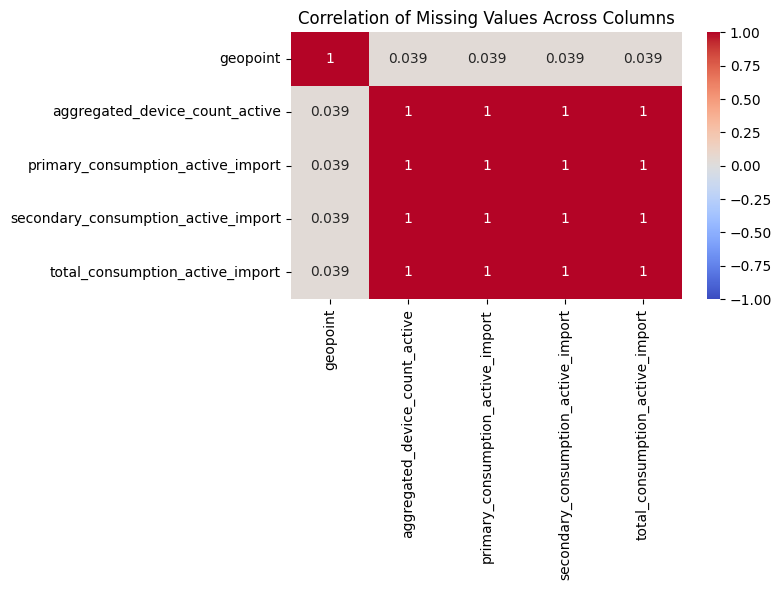

In [ ]:
missing_mask = df.isnull().astype(int)
missing_corr = missing_mask.corr()
cols_with_missing = df.columns[df.isnull().any()]
missing_corr = missing_corr.loc[cols_with_missing, cols_with_missing]

plt.figure(figsize=(8, 6))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation of Missing Values Across Columns")
plt.tight_layout()
plt.show()

In [ ]:
perfectly_correlated_pairs = []

for col1 in missing_corr.columns:
    for col2 in missing_corr.columns:
        if col1 != col2 and missing_corr.loc[col1, col2] == 1.0:
            pair = tuple(sorted([col1, col2]))
            perfectly_correlated_pairs.append(pair)

perfectly_correlated_pairs = list(set(perfectly_correlated_pairs))
cols_to_consider = set([col for pair in perfectly_correlated_pairs for col in pair])

print(f"Original rows: {len(df)}")

df = df.dropna(subset=cols_to_consider)

print(f"Rows after drop: {len(df)}")

Original rows: 1264318
Rows after drop: 1224902


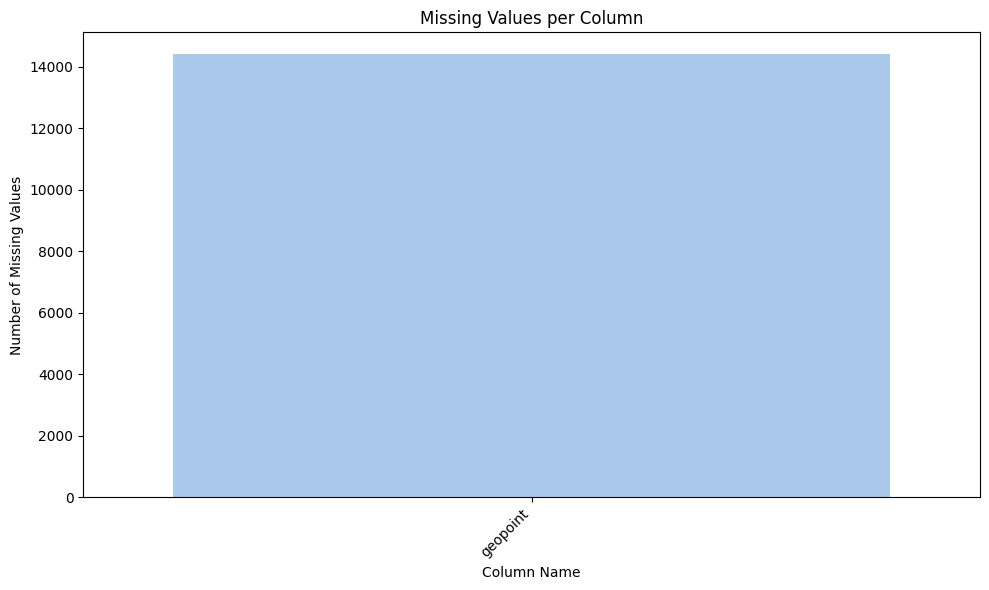

,missing_count,missing_percent
geopoint,14400,1.175604


In [ ]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, hue=missing_counts.index, palette="pastel")
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Column Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

missing_table = (
    df.isnull().sum()
    .to_frame(name='missing_count')
    .assign(missing_percent=lambda x: (x['missing_count'] / len(df)) * 100)
    .query('missing_count > 0')
    .sort_values('missing_count', ascending=False)
)

missing_table

In [ ]:
print(df.columns)

Index(['dataset_id', 'dno', 'dno_alias', 'secondary_substation_id', 'geopoint',
       'aggregated_device_count_active', 'primary_consumption_active_import',
       'secondary_consumption_active_import',
       'total_consumption_active_import', 'aggregated_device_count_reactive',
       'total_consumption_reactive_import', 'data_collection_log_timestamp',
       'insert_time', 'last_modified_time'],
      dtype='object')


In [ ]:
drop_cols = ['dno', 'dataset_id', 'dno_alias', 'secondary_substation_id', 'geopoint']

df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [ ]:
df.head()

,aggregated_device_count_active,primary_consumption_active_import,secondary_consumption_active_import,total_consumption_active_import,aggregated_device_count_reactive,total_consumption_reactive_import,data_collection_log_timestamp,insert_time,last_modified_time
0,145.0,25333.0,0.0,25333.0,153,1936,2024-06-18T20:30:00+01:00,2024-07-13T01:00:00+01:00,2024-07-13T01:00:00+01:00
2,9.0,1002.0,0.0,1002.0,9,213,2024-06-23T06:00:00+01:00,2024-07-18T01:00:00+01:00,2024-07-18T01:00:00+01:00
3,40.0,8219.0,0.0,8219.0,54,1185,2024-06-08T12:00:00+01:00,2024-07-11T01:00:00+01:00,2024-07-11T01:00:00+01:00
4,93.0,9153.0,0.0,9153.0,105,807,2024-06-29T01:30:00+01:00,2024-07-12T01:00:00+01:00,2024-07-12T01:00:00+01:00
5,130.0,30973.0,0.0,30973.0,159,1641,2024-06-16T21:00:00+01:00,2024-07-13T01:00:00+01:00,2024-07-13T01:00:00+01:00


In [ ]:
for col in ['data_collection_log_timestamp', 'insert_time', 'last_modified_time']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

if 'data_collection_log_timestamp' in df.columns:
    df['hour'] = df['data_collection_log_timestamp'].dt.hour
    df['dayofweek'] = df['data_collection_log_timestamp'].dt.dayofweek
    df['month'] = df['data_collection_log_timestamp'].dt.month
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

df = df.drop(columns=['insert_time', 'last_modified_time'], errors='ignore')

In [ ]:
df.head()

,aggregated_device_count_active,primary_consumption_active_import,secondary_consumption_active_import,total_consumption_active_import,aggregated_device_count_reactive,total_consumption_reactive_import,data_collection_log_timestamp,hour,dayofweek,month,is_weekend
0,145.0,25333.0,0.0,25333.0,153,1936,2024-06-18 20:30:00+01:00,20,1,6,0
2,9.0,1002.0,0.0,1002.0,9,213,2024-06-23 06:00:00+01:00,6,6,6,1
3,40.0,8219.0,0.0,8219.0,54,1185,2024-06-08 12:00:00+01:00,12,5,6,1
4,93.0,9153.0,0.0,9153.0,105,807,2024-06-29 01:30:00+01:00,1,5,6,1
5,130.0,30973.0,0.0,30973.0,159,1641,2024-06-16 21:00:00+01:00,21,6,6,1


In [ ]:
print(df.columns)

Index(['aggregated_device_count_active', 'primary_consumption_active_import',
       'secondary_consumption_active_import',
       'total_consumption_active_import', 'aggregated_device_count_reactive',
       'total_consumption_reactive_import', 'data_collection_log_timestamp',
       'hour', 'dayofweek', 'month', 'is_weekend'],
      dtype='object')


In [ ]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number])

outlier_summary = []

for col in numeric_cols.columns:
    q1 = numeric_cols[col].quantile(0.25)
    q3 = numeric_cols[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]
    outlier_pct = len(outliers) / len(df) * 100

    outlier_summary.append({
        'column': col,
        'outlier_count': len(outliers),
        'outlier_percent': outlier_pct
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='outlier_percent', ascending=False)

outlier_df

,column,outlier_count,outlier_percent
5,total_consumption_reactive_import,61656,5.033546
1,primary_consumption_active_import,50107,4.090695
3,total_consumption_active_import,50107,4.090695
0,aggregated_device_count_active,46929,3.831245
4,aggregated_device_count_reactive,25822,2.108087
8,month,1700,0.138787
2,secondary_consumption_active_import,0,0.000000
6,hour,0,0.000000
7,dayofweek,0,0.000000
9,is_weekend,0,0.000000


In [ ]:
df.head()

,aggregated_device_count_active,primary_consumption_active_import,secondary_consumption_active_import,total_consumption_active_import,aggregated_device_count_reactive,total_consumption_reactive_import,data_collection_log_timestamp,hour,dayofweek,month,is_weekend
0,145.0,25333.0,0.0,25333.0,153,1936,2024-06-18 20:30:00+01:00,20,1,6,0
2,9.0,1002.0,0.0,1002.0,9,213,2024-06-23 06:00:00+01:00,6,6,6,1
3,40.0,8219.0,0.0,8219.0,54,1185,2024-06-08 12:00:00+01:00,12,5,6,1
4,93.0,9153.0,0.0,9153.0,105,807,2024-06-29 01:30:00+01:00,1,5,6,1
5,130.0,30973.0,0.0,30973.0,159,1641,2024-06-16 21:00:00+01:00,21,6,6,1


In [ ]:
original = '/content/drive/MyDrive/Portfolio/Smart Meter Forecasting/data_versions/original.parquet'
df.to_parquet(original, index=False)